## 0 准备工作

### 0.1 import

In [1]:
import numpy as np
import pandas as pd

import sqlite3
import re

import jieba
import jieba.analyse as anls
stopwords = [line.strip() for line in open('stopwords.txt', 'r').readlines()] #停用词列表

import matplotlib .pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
sns.set(font='SimHei')

from wordcloud import WordCloud

### 0.2 读取数据

In [2]:
# 读取数据库
sql = '''
    SELECT a.id 
        , title
        , date
        , vol
        , period
        , intro
        , content
        , anno
    FROM mzdxj_info a
        , mzdxj_content b
    WHERE a.id = b.id
'''

df = pd.read_sql(sql, con=sqlite3.connect('mao.db'))

In [3]:
df.shape

(231, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
id         231 non-null int64
title      231 non-null object
date       231 non-null object
vol        231 non-null int64
period     231 non-null object
intro      231 non-null object
content    231 non-null object
anno       231 non-null object
dtypes: int64(2), object(6)
memory usage: 14.5+ KB


In [5]:
df.sample(5)

,id,title,date,vol,period,intro,content,anno
194,195,抗美援朝的伟大胜利和今后的任务,1953-09-12,5,社会主义革命和社会主义建设时期,这是毛泽东同志在中央人民政府委员会第二十四次会议上的讲话。,抗美援朝，经过三年，取得了伟大胜利，现在已经告一个段落。抗美援朝的胜利是靠什么得来的呢？刚才...,
223,224,组织力量反击右派分子的猖狂进攻,1957-06-08,5,社会主义革命和社会主义建设时期,这是毛泽东同志为中共中央起草的党内指示。,省市级机关和高等学校大鸣大放的时间，大约十五天左右即足。反动分子猖狂进攻。党团员中的动摇分子...,
198,199,为建设一个伟大的社会主义国家而奋斗,1954-09-15,5,社会主义革命和社会主义建设时期,这是毛泽东同志在中华人民共和国第一届全国人民代表大会第一次会议上的开幕词。,各位代表!中华人民共和国第一届全国人民代表大会第一次会议，今天在我国首都北京举行。代表总数一...,
216,217,在中国共产党第八届中央委员会第二次全体会议上的讲话,1956-11-15,5,社会主义革命和社会主义建设时期,,我讲四个问题；经济问题，国际形势问题，中苏关系问题，大民主小民主问题。一我们对问题要作全面的...,[1]这里是指孔子说的“七十而从心所欲，不逾矩”。见《论语·为政第二》。[2]指一九五六年六...
61,62,改造我们的学习,1941-05-19,3,抗日战争时期,这是毛泽东在延安干部会上所作的报告。这篇报告和《整顿党的作风》、《反对党八股》，是毛泽东关于...,我主张将我们全党的学习方法和学习制度改造一下。其理由如次：一中国共产党的二十年，就是马克思列...,〔1〕富县在延安南面约八十公里。〔2〕边币是一九四一年陕甘宁边区银行所发行的纸币。法币是一九...


### 0.3 相关函数

In [6]:
def contentToStr(cond, col='period'):
    '''
        将 DataFrame 中的指定内容转化为字符串
        @param cond: filter condition, str
        @param col: column name, str, default 'period'
        @return text: conversion results, str
    '''
    text = ' '.join(df[df[col] == cond]['content'].tolist())
    return text

In [7]:
def cutText(raw_text):
    '''
        中文分词，并去除停用词
        @param raw_text: raw text, str
        @return ouput: split text, str
    '''
    cut_text = jieba.cut(raw_text)
    output = ''
    
    for word in cut_text:
        if word not in stopwords:
            if word != '\t':
                output += word
                output += " "
    
    output = re.sub(r'\(\d*\)|\（\d*\）|\d*', '', output) #去除数字和序号
    
    return output

In [8]:
def wordCount(text):
    '''
        词频统计，生成条形图
        @param text: split text, str
    '''
    word_freq = anls.extract_tags(text, topK=20, withWeight=True)
    data = pd.DataFrame(word_freq)
    data.columns = ['word', 'frequency']

    fig, ax = plt.subplots(figsize = (6, 4), dpi=120)

    sns.barplot(x="frequency", y="word", data=data, label="word", palette="GnBu_d")
    sns.despine(bottom=True);

In [9]:
def wordCloud(text):
    '''
        生成词云
        @param text: split text, str
    '''
    cloud = WordCloud(
        font_path = 'fonts\FZBYSK.ttf', 
        background_color = 'white',
        max_words = 1024,
        max_font_size = 100
    )
    
    word_cloud = cloud.generate(text)

    plt.figure(figsize=(12, 12))
    plt.imshow(word_cloud) 
    plt.axis('off');

In [10]:
period_1 = cutText(contentToStr('第一次国内革命战争时期'))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\gaiusyao\AppData\Local\Temp\jieba.cache
Loading model cost 0.991 seconds.
Prefix dict has been built succesfully.


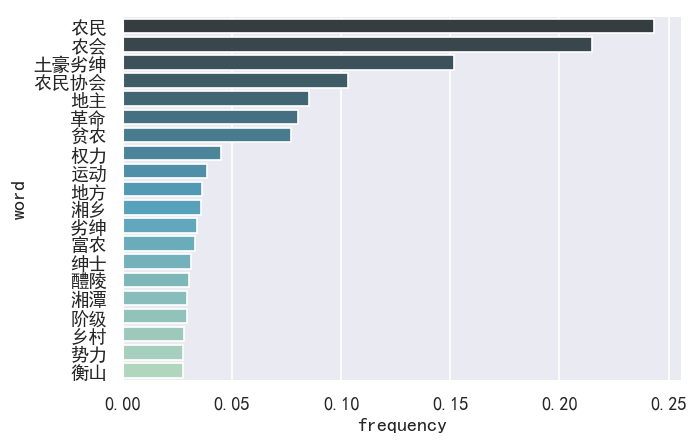

In [11]:
wordCount(period_1)

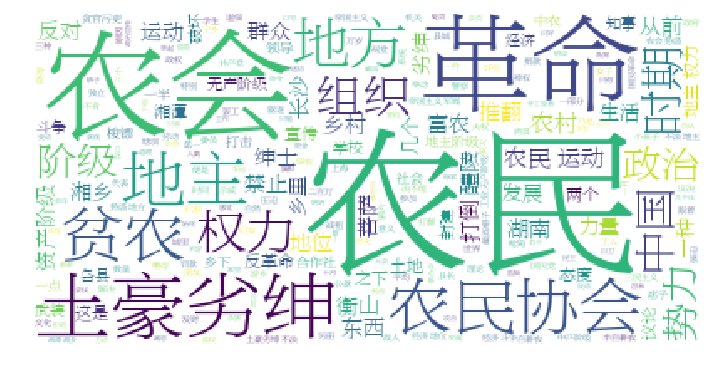

In [12]:
wordCloud(period_1)

In [13]:
period_2 = cutText(contentToStr('第二次国内革命战争时期'))

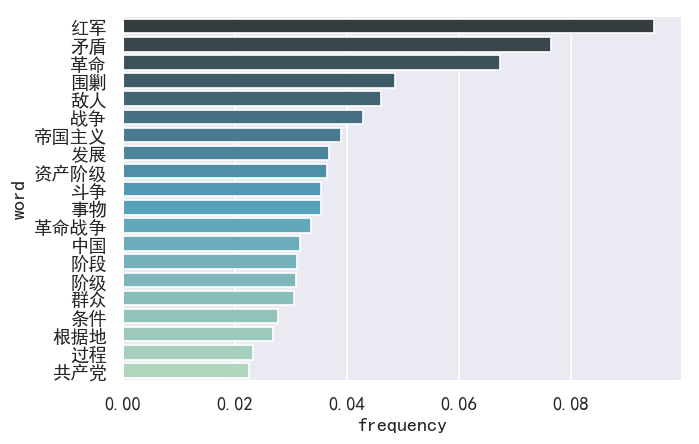

In [14]:
wordCount(period_2)

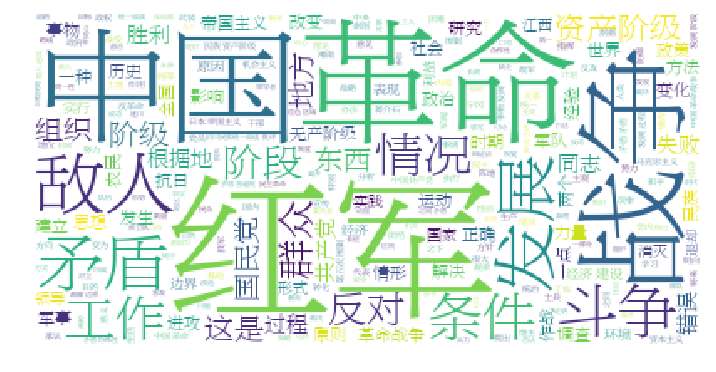

In [15]:
wordCloud(period_2)

In [16]:
period_3 = cutText(contentToStr('抗日战争时期'))

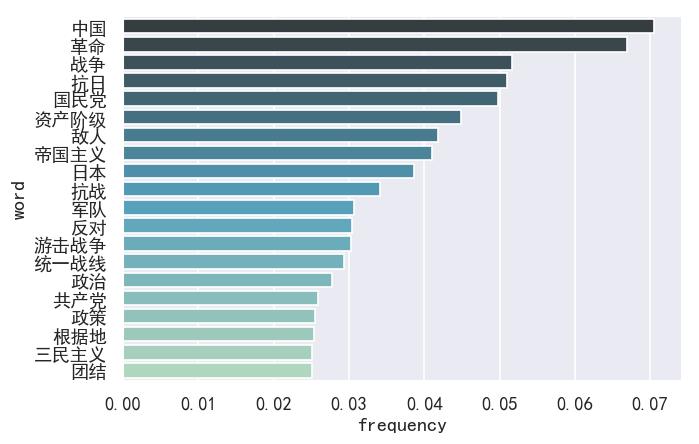

In [17]:
wordCount(period_3)

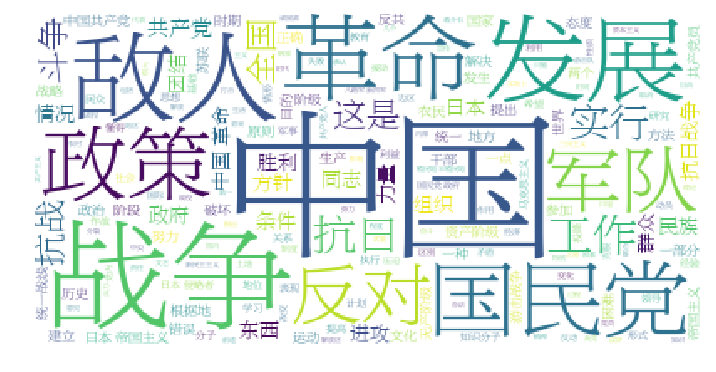

In [18]:
wordCloud(period_3)

In [19]:
period_4 = cutText(contentToStr('第三次国内革命战争时期'))

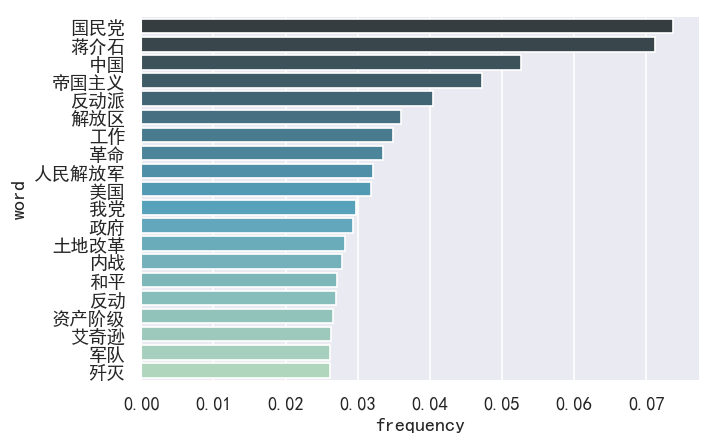

In [20]:
wordCount(period_4)

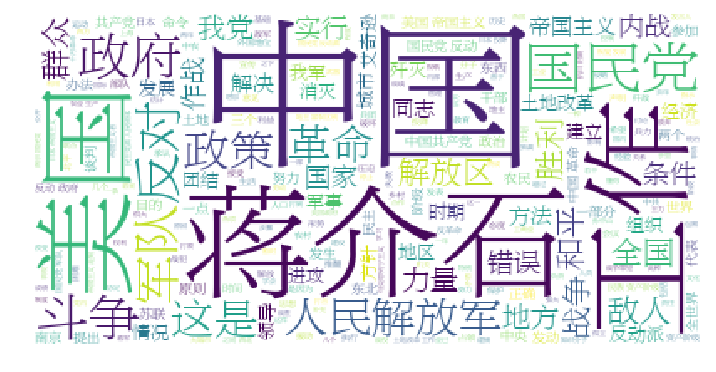

In [21]:
wordCloud(period_4)

In [22]:
period_5 = cutText(contentToStr('社会主义革命和社会主义建设时期'))

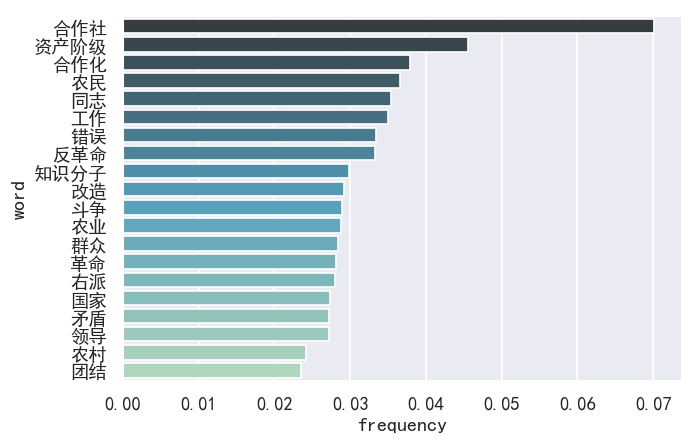

In [23]:
wordCount(period_5)

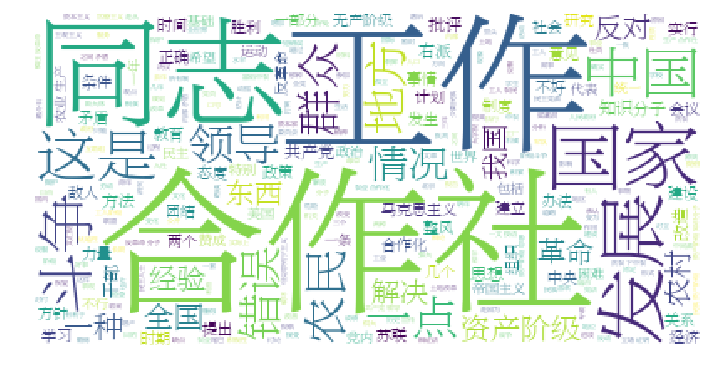

In [24]:
wordCloud(period_5)